# Introduction

    Cancer is a complex and devastating disease that affects millions of people worldwide. With advancements in technology and the availability of vast amounts of data, data science techniques have emerged as a promising tool for cancer classification. In this project, we aim to leverage the power of data science to develop a classification model that can accurately predict the presence of cancer based on various input variables.

In this cancer classification project using data science, we will address the following points:

* Dataset assessment
* Dataset cleaning
* Dataset testing
* Testing and training splits
* Random forest classification
* Gaussian naive Bayes classification 
* Model comparison
    
By combining these different steps, we aim to develop an accurate and reliable cancer classification model that can aid in outcome prediction and informed medical decision-making..

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display_html
import seaborn as sns

%matplotlib inline

In [104]:

df = pd.read_csv('dataset/brca.csv', sep=',', encoding='latin-1')

## Assessing the dataset

##### We will begin with a thorough analysis of the provided dataset. This involves understanding the meaning and characteristics of the variables present, as well as gaining an understanding of the different cancer classes we are seeking to predict.

In [105]:
# Performing visual assesment
display_html(df.head())

# Check the general information
print(df.info())

,Unnamed: 0,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,...,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,y
0,1,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,B
1,2,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,B
2,3,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,B
3,4,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,B
4,5,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           569 non-null    int64  
 1   x.radius_mean        569 non-null    float64
 2   x.texture_mean       569 non-null    float64
 3   x.perimeter_mean     569 non-null    float64
 4   x.area_mean          569 non-null    float64
 5   x.smoothness_mean    569 non-null    float64
 6   x.compactness_mean   569 non-null    float64
 7   x.concavity_mean     569 non-null    float64
 8   x.concave_pts_mean   569 non-null    float64
 9   x.symmetry_mean      569 non-null    float64
 10  x.fractal_dim_mean   569 non-null    float64
 11  x.radius_se          569 non-null    float64
 12  x.texture_se         569 non-null    float64
 13  x.perimeter_se       569 non-null    float64
 14  x.area_se            569 non-null    float64
 15  x.smoothness_se      569 non-null    flo

In [106]:
# Get accurate info on the dataset
print(df.describe())

       Unnamed: 0  x.radius_mean  x.texture_mean  x.perimeter_mean   
count  569.000000     569.000000      569.000000        569.000000  \
mean   285.000000      14.127292       19.289649         91.969033   
std    164.400426       3.524049        4.301036         24.298981   
min      1.000000       6.981000        9.710000         43.790000   
25%    143.000000      11.700000       16.170000         75.170000   
50%    285.000000      13.370000       18.840000         86.240000   
75%    427.000000      15.780000       21.800000        104.100000   
max    569.000000      28.110000       39.280000        188.500000   

       x.area_mean  x.smoothness_mean  x.compactness_mean  x.concavity_mean   
count   569.000000         569.000000          569.000000        569.000000  \
mean    654.889104           0.096360            0.104341          0.088799   
std     351.914129           0.014064            0.052813          0.079720   
min     143.500000           0.052630            0.01

In [107]:
# Check for null values
print("Null -> \n",df.isna().sum())

# Check for Duplicated values
print("\n Duplicates -> \n",df.duplicated().sum())

Null -> 
 Unnamed: 0             0
x.radius_mean          0
x.texture_mean         0
x.perimeter_mean       0
x.area_mean            0
x.smoothness_mean      0
x.compactness_mean     0
x.concavity_mean       0
x.concave_pts_mean     0
x.symmetry_mean        0
x.fractal_dim_mean     0
x.radius_se            0
x.texture_se           0
x.perimeter_se         0
x.area_se              0
x.smoothness_se        0
x.compactness_se       0
x.concavity_se         0
x.concave_pts_se       0
x.symmetry_se          0
x.fractal_dim_se       0
x.radius_worst         0
x.texture_worst        0
x.perimeter_worst      0
x.area_worst           0
x.smoothness_worst     0
x.compactness_worst    0
x.concavity_worst      0
x.concave_pts_worst    0
x.symmetry_worst       0
x.fractal_dim_worst    0
y                      0
dtype: int64

 Duplicates -> 
 0


In [108]:
df['y'].value_counts()

y
B    357
M    212
Name: count, dtype: int64

## Cleaning Dataset

##### After assessment, we will move on to the dataset cleaning step. This will involve handling missing values, detecting and managing outliers, and addressing any data quality issues identified during the assessment. A clean and consistent dataset is crucial for obtaining accurate and reliable results.

In [109]:
df_copy = df.copy()
df_copy.drop(df_copy.columns[0], axis=1, inplace=True)
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   x.radius_mean        569 non-null    float64
 1   x.texture_mean       569 non-null    float64
 2   x.perimeter_mean     569 non-null    float64
 3   x.area_mean          569 non-null    float64
 4   x.smoothness_mean    569 non-null    float64
 5   x.compactness_mean   569 non-null    float64
 6   x.concavity_mean     569 non-null    float64
 7   x.concave_pts_mean   569 non-null    float64
 8   x.symmetry_mean      569 non-null    float64
 9   x.fractal_dim_mean   569 non-null    float64
 10  x.radius_se          569 non-null    float64
 11  x.texture_se         569 non-null    float64
 12  x.perimeter_se       569 non-null    float64
 13  x.area_se            569 non-null    float64
 14  x.smoothness_se      569 non-null    float64
 15  x.compactness_se     569 non-null    flo

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

## Testing and Training Splits

##### After validating the dataset, we will divide it into training and testing sets. The training set will be used to train our classification models, while the test set will be used to evaluate their performance on unseen data. This division allows us to measure the generalization ability of our models.

In [111]:
# Slice the dataframe into x(data) and y(target)
X, y = df_copy.loc[:,df_copy.columns != 'y'], df_copy['y']

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

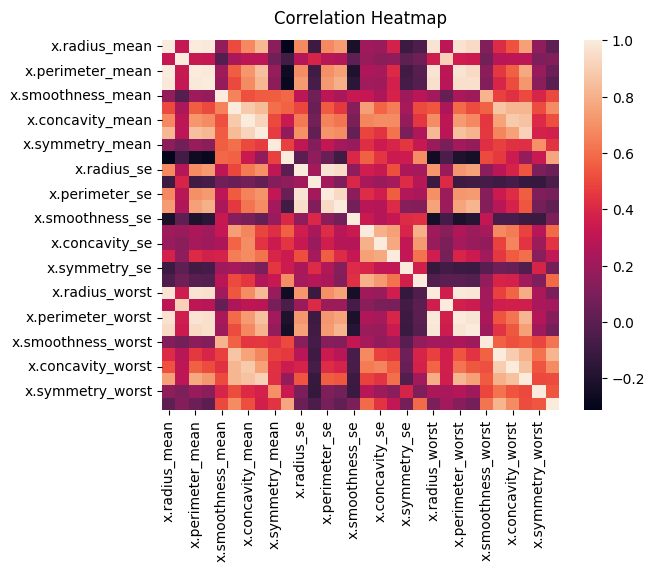

In [113]:
# Correlation matrix
heatmap = sns.heatmap(X.corr())
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

## Random forest classification

##### We will utilize the random forest classification algorithm to build our first model. Random forest is an ensemble learning method that combines multiple decision trees to make classification decisions. We will explore different configurations and parameters to optimize the model's performance.

In [114]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
print("Accuracy on training set: {:.2%}".format(clf.score(X_train, y_train)))
print("Accuracy on test set: {:.2%}".format(clf.score(X_test, y_test)))

Accuracy on training set: 100.00%
Accuracy on test set: 95.80%


## Gaussian Naive Bayes

##### Next, we will use the Gaussian naive Bayes algorithm to construct a second classification model. This model applies Bayes' theorem, assuming that the input variables are independent and follow a Gaussian distribution. We will evaluate the performance of this model compared to the random forest.test

In [115]:
nb = GaussianNB().fit(X_train, y_train)
pred = nb.predict(X_test)
print("Accuracy on training set: {:.2%}".format(nb.score(X_train, y_train)))
print("Accuracy on test set: {:.2%}".format(nb.score(X_test, y_test)))

Accuracy on training set: 94.84%
Accuracy on test set: 91.61%


## Model Comparison